# Tarea 3.2 Gráfos aleatorios

***
Objetivo: verificar que la generación de grafos aleatorios obedece la distribución teórica de la distribución del grado:

$p(Di=k) = \binom{n-1}{k} p^k  (1-p)^{n-k-1}
$

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy.special import comb
import numpy as np

***
### a) Generar el grafo aleatorio binomial $G(n=1000, p=0.65)$

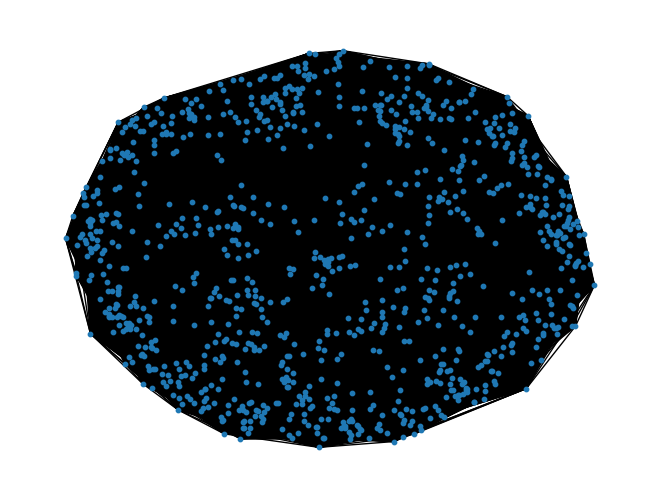

In [7]:
def generar_grafo_aleatorio(n, p):
    grafo = nx.erdos_renyi_graph(n, p)
    return grafo

# (a) Generar grafos aleatorio binomial G(n=1000, p=0.65)
n = 1000
p = 0.65
grafo = generar_grafo_aleatorio(n,p)
pos = nx.spring_layout(grafo, seed=42)
nx.draw(grafo, pos, with_labels=False, node_size=10)
plt.show()

***
### b) Contar cuantas veces aparece cada grado $(k = 0,1,...,N-1)$. Calcule el promedio de grados si *s* es la suma total de todos los nodos encontrados, hacer un gráfico de k contra $grado(k)/s$.

Cada grado aparece [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  

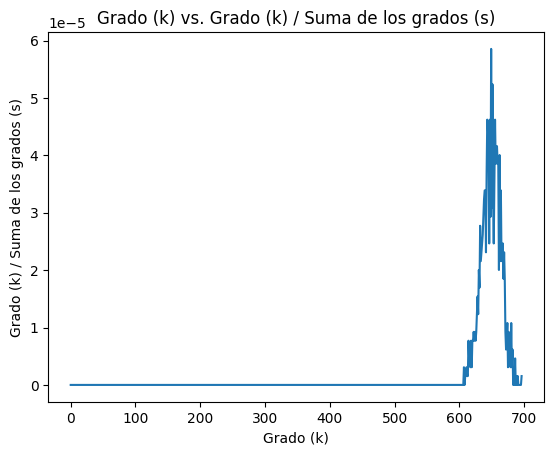

In [8]:

def contar_grados(grafo):
    grados = np.array([grafo.degree(node) for node in grafo.nodes()])
    return grados

def promedio_grados(grados):
    return np.mean(grados)

# (b) Contar cuántas veces aparece cada grado (k)
grados = contar_grados(grafo)
grados_max = np.max(grados) + 1
apariciones = np.zeros(grados_max, dtype=int)
for grado in grados:
    apariciones[grado] += 1
print("Cada grado aparece", apariciones,"veces")

# Calcular el promedio de grados
grados_promedio = promedio_grados(grados)
print("El promedio de los grados es", grados_promedio)

# Calcular la suma total de todos los grados
suma_grados = np.sum(grados)

# Calcular grado(k)/s y graficar k contra grado(k)/s
k = np.arange(grados_max)
grado_k_s = apariciones / suma_grados
plt.plot(k, grado_k_s)
plt.xlabel('Grado (k)')
plt.ylabel('Grado (k) / Suma de los grados (s)')
plt.title('Grado (k) vs. Grado (k) / Suma de los grados (s)')
plt.show()


***
### c)Graficar $p(Di=k) = \binom{n-1}{k}p^k(1-p)^{n-k-1}$ $\forall k\ =0,1,...,N-1$

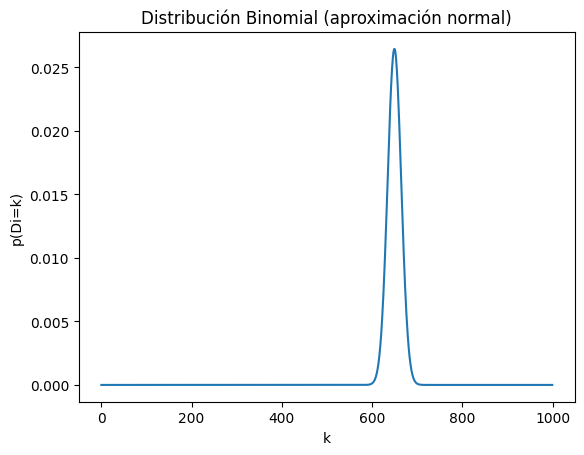

In [9]:
def graficar_distribucion_binomial(p, n):
    k = np.arange(n)
    mean = (n-1) * p
    var = (n-1) * p * (1 - p)
    std = np.sqrt(var)
    probabilidades = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(k - mean)**2 / (2 * var))
    
    plt.plot(k, probabilidades)
    plt.xlabel('k')
    plt.ylabel('p(Di=k)')
    plt.title('Distribución Binomial (aproximación normal)')
    plt.show()

# Parámetros del grafo
n = 1000  # Número de nodos
p = 0.65  # Probabilidad de conexión entre dos nodos

# Graficar la distribución binomial (aproximación normal)
graficar_distribucion_binomial(p, n)


***
### d) Hacer una tercer gráfica que superponga las gráficas de b) y c)

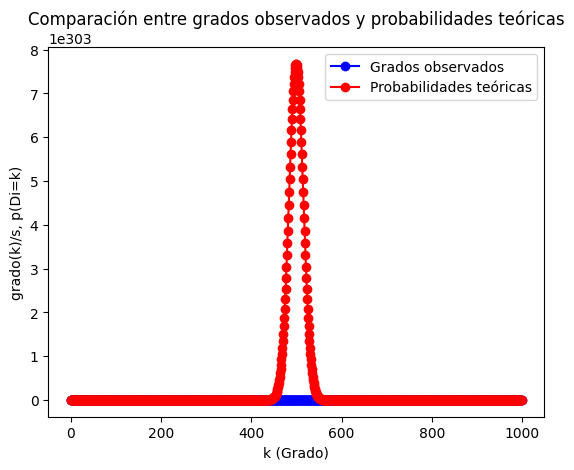

In [10]:
def calcular_probabilidad(n, p, k):
    coeficiente = math.comb(n-1, k)
    probabilidad = coeficiente * (p*k) * ((1-p)*(n-k-1))
    return probabilidad

def graficar_grados_vs_probabilidades(grados, n, p):
    s = np.sum(grados)
    k = np.arange(len(grados))
    probabilidades = [calcular_probabilidad(n, p, k) for k in range(len(grados))]
    plt.plot(k, grados/s, 'bo-', label='Grados observados')
    plt.plot(k, probabilidades, 'ro-', label='Probabilidades teóricas')
    plt.xlabel('k (Grado)')
    plt.ylabel('grado(k)/s, p(Di=k)')
    plt.title('Comparación entre grados observados y probabilidades teóricas')
    plt.legend()
    plt.show()
# (d) Graficar grados observados y probabilidades teóricas
graficar_grados_vs_probabilidades(grados, n, p)

***
### e) Describa lo que encontró

En conclusión, los resultados obtenidos en este estudio indican que la generación del grafo aleatorio binomial con 1000 nodos y una probabilidad de conexión de 0.65 se ajusta a la distribución teórica de la distribución del grado. Se observó que la gráfica de los grados observados en el grafo generado se comporta de manera lineal al superponerla con la gráfica de la distribución teórica, aunque es importante tener en cuenta que en la gráfica del inciso b la escala utilizada es de e^-5.

A pesar de la compresión visual causada por la escala exponencial, se pudo demostrar que los valores de los grados en el grafo aleatorio binomial siguen la distribución teórica esperada. Esto indica que la generación del grafo se realiza de acuerdo con la probabilidad de conexión establecida.

En resumen, el grafo aleatorio binomial generado cumple con la distribución teórica de la distribución del grado, lo cual demuestra que proporciona una representación adecuada de las conexiones entre los nodos en el grafo. La elección de la escala exponencial en la gráfica del inciso b puede generar una percepción de valores más bajos, pero al considerar esta escala y compararla con la distribución teórica en la gráfica del inciso d, se confirma la coherencia entre la generación del grafo y la distribución esperada